In [1]:
%load_ext autoreload
%autoreload 2
# %reload_ext lab_black
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


from keras.callbacks import Callback
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    LearningRateScheduler,
    ReduceLROnPlateau,
    EarlyStopping,
    TensorBoard,
)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2
from tensorflow.compat.v2.keras.layers import BatchNormalization
from tensorflow.python.client import device_lib
from utils import *
from models.unet import *

Using TensorFlow backend.


In [3]:
np.random.seed(8)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5014636089580128377
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4937233203
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10524517853789358413
physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


# Loading images

In [4]:
image_dir_train = "data/training/images/"
files = os.listdir(image_dir_train)
n_train = len(files)
print(f"Loading training images, images loaded: {n_train} ")
imgs_train = np.asarray([load_img(image_dir_train + files[i]) for i in range(n_train)])
gt_dir_train = "data/training/groundtruth/"
print(f"Loading groundtruth images, images loaded: {n_train} ")
gt_imgs_train = np.asarray([load_img(gt_dir_train + files[i]) for i in range(n_train)])

Loading training images, images loaded: 80 
Loading groundtruth images, images loaded: 80 


In [5]:
image_dir_val = "data/validating/images/"
files = os.listdir(image_dir_val)
n_val = len(files)
print(f"Loading validating images, images loaded: {n_val} ")
imgs_val = np.asarray([load_img(image_dir_val + files[i]) for i in range(n_val)])
gt_dir_val = "data/validating/groundtruth/"
print(f"Loading validating groundtruth, images loaded: {n_val} ")
gt_imgs_val = np.asarray([load_img(gt_dir_val + files[i]) for i in range(n_val)])

Loading validating images, images loaded: 20 
Loading validating groundtruth, images loaded: 20 


In [6]:
X_train, Y_train = imag_rotation_aug(imgs_train, gt_imgs_train)

In [7]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [8]:
print(X_train.shape)
print(Y_train.shape)
n_train = Y_train.shape[0]

(720, 448, 448, 3)
(720, 448, 448)


In [9]:
X_val, Y_val = imag_rotation_aug(imgs_val, gt_imgs_val)

In [10]:
X_val = np.asarray(X_val)
Y_val = np.asarray(Y_val)

In [11]:
print(X_val.shape)
print(Y_val.shape)
n_val = Y_val.shape[0]

(180, 448, 448, 3)
(180, 448, 448)


In [12]:
# We define parameters of the model
BATCH_SIZE = 150
WINDOW_SIZE = 64
PATCH_SIZE = 16
EPOCHS = 200
STEPS_PER_EPOCH = 100
WIDTH = 448
model = U_NET(
    shape=(WINDOW_SIZE, WINDOW_SIZE, 3),
    BATCH_SIZE=BATCH_SIZE,
    WINDOW_SIZE=WINDOW_SIZE,
    PATCH_SIZE=PATCH_SIZE,
    EPOCHS=EPOCHS,
    STEPS_PER_EPOCH=STEPS_PER_EPOCH,
    WIDTH=WIDTH,
)

# Train the Model


In [13]:
history = model.train(X_train, Y_train, n_train, X_val, Y_val, n_val)
model.save("best_unet.h5")

Epoch 1/200
 99/100 [============================>.] - ETA: 1s - loss: 0.5237 - accuracy: 0.7395 - recall: 0.7454 - f1: 0.7404
Epoch 00001: val_loss improved from inf to 10.93762, saving model to saved_models/Unet_batchnorm_validation-001-0.250000.h5
100/100 [==============================] - 169s 2s/step - loss: 0.5218 - accuracy: 0.7408 - recall: 0.7466 - f1: 0.7416 - val_loss: 10.9376 - val_accuracy: 0.2500 - val_recall: 0.2500 - val_f1: 0.2500
Epoch 2/200
 99/100 [============================>.] - ETA: 1s - loss: 0.4225 - accuracy: 0.8040 - recall: 0.8013 - f1: 0.8034
Epoch 00002: val_loss improved from 10.93762 to 8.33724, saving model to saved_models/Unet_batchnorm_validation-002-0.299950.h5
100/100 [==============================] - 162s 2s/step - loss: 0.4219 - accuracy: 0.8041 - recall: 0.8015 - f1: 0.8035 - val_loss: 8.3372 - val_accuracy: 0.3138 - val_recall: 0.2941 - val_f1: 0.3000
Epoch 3/200
 99/100 [============================>.] - ETA: 1s - loss: 0.3720 - accuracy: 0.8

Epoch 21/200
 99/100 [============================>.] - ETA: 1s - loss: 0.1817 - accuracy: 0.9211 - recall: 0.9209 - f1: 0.9211
Epoch 00021: val_loss improved from 0.28714 to 0.27323, saving model to saved_models/Unet_batchnorm_validation-021-0.886258.h5
100/100 [==============================] - 154s 2s/step - loss: 0.1820 - accuracy: 0.9210 - recall: 0.9208 - f1: 0.9210 - val_loss: 0.2732 - val_accuracy: 0.8863 - val_recall: 0.8861 - val_f1: 0.8863
Epoch 22/200
 99/100 [============================>.] - ETA: 1s - loss: 0.1785 - accuracy: 0.9260 - recall: 0.9260 - f1: 0.9260
Epoch 00022: val_loss did not improve from 0.27323
100/100 [==============================] - 152s 2s/step - loss: 0.1782 - accuracy: 0.9262 - recall: 0.9263 - f1: 0.9262 - val_loss: 0.2776 - val_accuracy: 0.8922 - val_recall: 0.8924 - val_f1: 0.8922
Epoch 23/200
 99/100 [============================>.] - ETA: 1s - loss: 0.1746 - accuracy: 0.9276 - recall: 0.9278 - f1: 0.9276
Epoch 00023: val_loss did not improve 

100/100 [==============================] - 163s 2s/step - loss: 0.1399 - accuracy: 0.9417 - recall: 0.9417 - f1: 0.9417 - val_loss: 0.2319 - val_accuracy: 0.9125 - val_recall: 0.9125 - val_f1: 0.9125
Epoch 42/200
 99/100 [============================>.] - ETA: 1s - loss: 0.1298 - accuracy: 0.9475 - recall: 0.9475 - f1: 0.9475
Epoch 00042: val_loss did not improve from 0.23185
100/100 [==============================] - 158s 2s/step - loss: 0.1295 - accuracy: 0.9477 - recall: 0.9476 - f1: 0.9477 - val_loss: 0.2365 - val_accuracy: 0.9085 - val_recall: 0.9088 - val_f1: 0.9086
Epoch 43/200
 99/100 [============================>.] - ETA: 1s - loss: 0.1277 - accuracy: 0.9476 - recall: 0.9477 - f1: 0.9476
Epoch 00043: val_loss did not improve from 0.23185
100/100 [==============================] - 155s 2s/step - loss: 0.1275 - accuracy: 0.9479 - recall: 0.9480 - f1: 0.9479 - val_loss: 0.2471 - val_accuracy: 0.9054 - val_recall: 0.9057 - val_f1: 0.9054
Epoch 44/200
 99/100 [====================

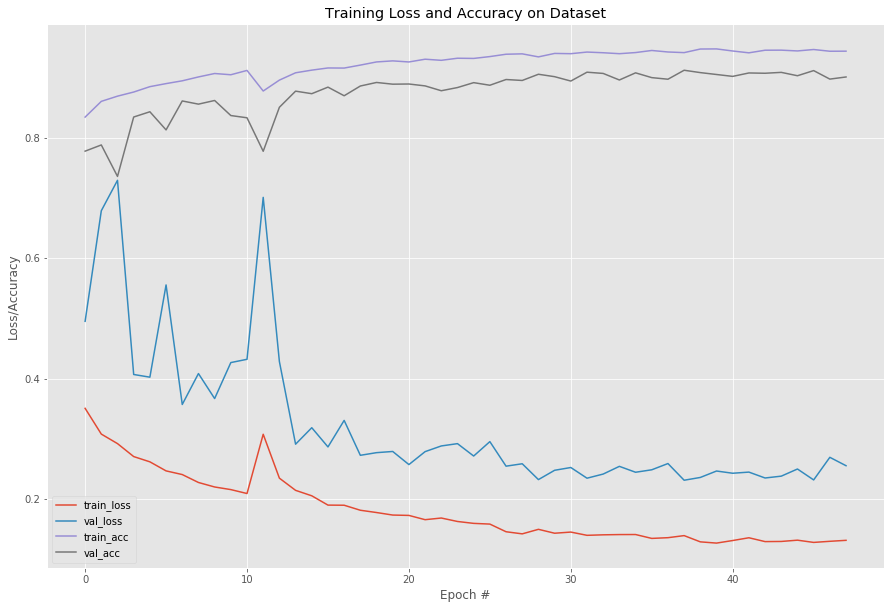

In [19]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"][3:], label="train_loss")
plt.plot(history.history["val_loss"][3:], label="val_loss")
plt.plot(history.history["accuracy"][3:], label="train_acc")
plt.plot(history.history["val_accuracy"][3:], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plots/Unet_batchnorm_validation.pdf")
plt.show()

# Generate Submission

In [20]:
model = U_NET(
    shape=(WINDOW_SIZE, WINDOW_SIZE, 3),
    BATCH_SIZE=BATCH_SIZE,
    WINDOW_SIZE=WINDOW_SIZE,
    PATCH_SIZE=PATCH_SIZE,
    EPOCHS=EPOCHS,
    STEPS_PER_EPOCH=STEPS_PER_EPOCH,
    WIDTH=WIDTH,
)
model.load("best_unet.h5")
image_filenames = []
for i in range(1, 51):
    image_filename = "data/test_set_images/test_" + str(i) + "/test_" + str(i) + ".png"
    image_filenames.append(image_filename)

submission_filename = "best_unet.csv"
generate_submission(model, submission_filename, *image_filenames)

Generating predictions for image:  data/test_set_images/test_1/test_1.png
Generating predictions for image:  data/test_set_images/test_2/test_2.png
Generating predictions for image:  data/test_set_images/test_3/test_3.png
Generating predictions for image:  data/test_set_images/test_4/test_4.png
Generating predictions for image:  data/test_set_images/test_5/test_5.png
Generating predictions for image:  data/test_set_images/test_6/test_6.png
Generating predictions for image:  data/test_set_images/test_7/test_7.png
Generating predictions for image:  data/test_set_images/test_8/test_8.png
Generating predictions for image:  data/test_set_images/test_9/test_9.png
Generating predictions for image:  data/test_set_images/test_10/test_10.png
Generating predictions for image:  data/test_set_images/test_11/test_11.png
Generating predictions for image:  data/test_set_images/test_12/test_12.png
Generating predictions for image:  data/test_set_images/test_13/test_13.png
Generating predictions for ima